<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine%20learning/sklearn_07_modele_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


**Julien VALENTIN**, **mars 2022**, d'après 

> [Machine learning in Python with scikit-learn](https://www.fun-mooc.fr/fr/cours/machine-learning-python-scikit-learn/) d'I.N.R.I.A sur [F.U.N](https://www.fun-mooc.fr/fr/)

# Régression linéaire pour un modèle linéaire

### Import

In [2]:
import pandas

In [3]:
html_data = pandas.read_html("https://github.com/INRIA/scikit-learn-mooc/blob/57f2e69a976136a9d1f9409b69ef0d6b3509903c/datasets/penguins_regression.csv")

data = html_data[0]
data.head(10)

,Unnamed: 0,Flipper Length (mm),Body Mass (g)
0,NaN,181.0,3750.0
1,NaN,186.0,3800.0
2,NaN,195.0,3250.0
3,NaN,193.0,3450.0
4,NaN,190.0,3650.0
5,NaN,181.0,3625.0
6,NaN,195.0,4675.0
7,NaN,193.0,3475.0
8,NaN,190.0,4250.0
9,NaN,186.0,3300.0


In [4]:
data = data.drop(columns="Unnamed: 0")
data.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Flipper Length (mm)  342 non-null    float64
 1   Body Mass (g)        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


### Séparation de l'attribut et de la cible

In [6]:
target_name = "Body Mass (g)"
feature_name = "Flipper Length (mm)"

x, y = data[[feature_name]], data[target_name]

### Modélisation

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()    # Modèle
linear_regression.fit(x, y)               # Entraînement

LinearRegression()

In [8]:
weight_flipper_length = linear_regression.coef_[0]    # Coefficient directeur
weight_flipper_length

49.68556640610011

In [9]:
intercept_body_mass = linear_regression.intercept_    # Translation
intercept_body_mass

-5780.831358077066

### Reconstruction du modèle linéaire

In [10]:
import numpy

flipper_length_range = numpy.linspace(x.min(), x.max(), num=300)

predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

Voyons le résultat.

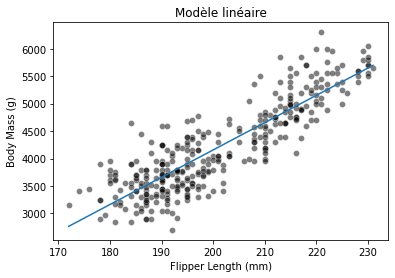

In [11]:
from matplotlib import pyplot
import seaborn

seaborn.scatterplot(x=data[feature_name], y=y, color="black", alpha=0.5)
pyplot.plot(flipper_length_range, predicted_body_mass)
_ = pyplot.title("Modèle linéaire")

### Evaluation du modèle

Deux exemples de métriques permettant d'évaluer le modèle sont les moindres carrés et les écarts moyens.

In [12]:
from sklearn.metrics import mean_squared_error

prediction = linear_regression.predict(x)
erreur = mean_squared_error(y, prediction)
print(f"L'erreur de moindres carrés est {erreur:.2f}")

L'erreur de moindres carrés est 154546.19


In [13]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(y, prediction)
print(f"L'erreur des écarts moyens est {model_error:.2f} g")

L'erreur des écarts moyens est 313.00 g


# Régression linéaire pour un modèle non-linéaire

On construit un faux jeu de données bruité à deux dimensions. On suppose une expérience d'un processus :

$$ y = x^3 - \frac{1}{2} x^2 + \epsilon $$

où $\epsilon$ suit une loi normale standard.

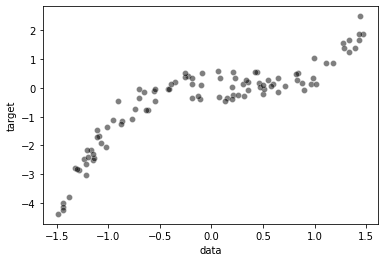

In [14]:
graine = numpy.random.RandomState(0)    # pour la reproductibilité

# Construction du jeu de données
N = 100                            # nombre de données
xg = -1.5                          # 
xd =  1.5                          # 
dx = xd - xg                       # longueur du jeu de données

x_ = graine.rand(N) * dx - dx/2    # paramètre échantilloné sur le segment [xg, xd]

bruit = graine.randn(N) * .3         # bruit

y_ = x_**3 - .5*x_**2 + bruit        # mesures

import pandas
donnees = pandas.DataFrame({"data": x_, "target": y_})

# Visualisation
import seaborn
_ = seaborn.scatterplot(data=donnees, x="data", y="target", color="black", alpha=0.5)

### Intuition à la main

$$ f(x) = a \cdot x + b $$

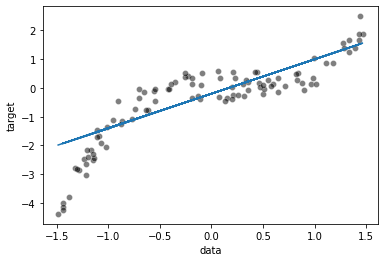

In [15]:
def f(x, a=0, b=0):
    "Droite dirigée par theta et translatée de y0"
    y = a * x + b
    return y

y = f(x_, a=1.2, b=-0.2)

ax = seaborn.scatterplot(data=donnees, x="data", y="target", color="black", alpha=0.5)
_ = ax.plot(x_, y)

In [16]:
erreur = mean_squared_error(y_, f(x_, a=1.2, b=-0.2))
print(f"L'erreur des moindres carrés vaut {erreur}")

L'erreur des moindres carrés vaut 0.5526142096258004


### Avec `scikit-learn`

In [17]:
regression = LinearRegression()
x_2D = x_.reshape(-1, 1)
regression.fit(x_2D, y_)

predictions = regression.predict(x_2D)

In [18]:
erreur = mean_squared_error(y_, predictions)
print(f"L'erreur des moindres carrés vaut {erreur}")

L'erreur des moindres carrés vaut 0.48771439636719294


# Régression linéaire avec plusieurs attributs

In [19]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100    # changement d'échelle (k$)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Entraînement d'une régression linéaire

In [20]:
modele = LinearRegression()
modele.fit(data, target)

LinearRegression()

### `cross_validation` avec $10$ boucles

In [21]:
from sklearn.model_selection import cross_validate

resultats = cross_validate(modele,
                           data,
                           target,
                           scoring="neg_mean_absolute_error",
                           return_estimator=True,
                           cv=10,
                           n_jobs=2)

In [22]:
print(f"Erreur des écarts moyens: "
      f"{-resultats['test_score'].mean():.3f} k$ +/- "
      f"{resultats['test_score'].std():.3f}")

Erreur des écarts moyens: 54.452 k$ +/- 9.109


In [23]:
import pandas

poids = pandas.DataFrame([estimateur.coef_ for estimateur in resultats["estimator"]], columns=data.columns)
poids.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43.611974,0.938978,-10.650642,64.472052,-0.000405,-0.391396,-42.149547,-43.454539
std,0.813154,0.119980,1.618097,8.938181,0.000598,0.066839,1.325018,2.010166
min,42.629253,0.635488,-12.817547,50.807236,-0.001602,-0.561852,-45.087728,-47.999610
25%,42.815174,0.911945,-11.551795,58.492370,-0.000641,-0.404144,-42.650960,-44.068720
50%,43.821881,0.964193,-11.122685,66.383735,-0.000433,-0.377852,-42.026490,-43.375942
75%,44.180161,0.995565,-9.563624,68.108931,-0.000128,-0.350502,-41.193983,-42.446086
max,44.701461,1.073691,-7.777559,81.709895,0.000484,-0.336350,-40.634870,-40.638396


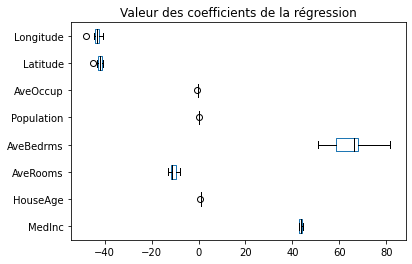

In [24]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
poids.plot.box(color=color, vert=False)
_ = plt.title("Valeur des coefficients de la régression")

# Régression pour une classification

## Un exemple sur les espèces de pingouins

### Téléchargement et import

In [25]:
dataset = pandas.read_html("https://github.com/INRIA/scikit-learn-mooc/blob/57f2e69a976136a9d1f9409b69ef0d6b3509903c/datasets/penguins_classification.csv")[0]
dataset = dataset.drop(columns="Unnamed: 0")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Culmen Length (mm)  342 non-null    float64
 1   Culmen Depth (mm)   342 non-null    float64
 2   Species             342 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.1+ KB


In [26]:
dataset.head(10)

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie
5,38.9,17.8,Adelie
6,39.2,19.6,Adelie
7,34.1,18.1,Adelie
8,42.0,20.2,Adelie
9,37.8,17.1,Adelie


### Séparation des prédicteurs et de la classe à prédire, visualisation

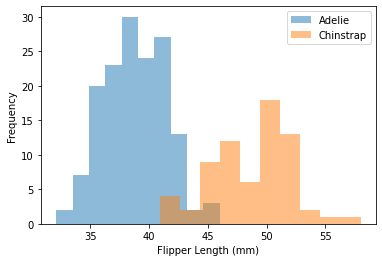

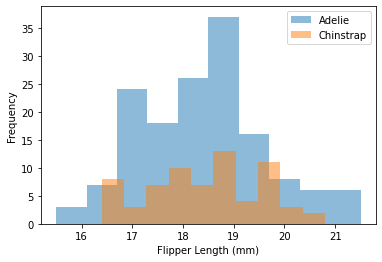

In [27]:
dataset = dataset.set_index("Species").loc[ ["Adelie", "Chinstrap"] ].reset_index()

nom_predicteurs = ["Culmen Length (mm)", "Culmen Depth (mm)"]
nom_cible = "Species"

for nom in nom_predicteurs:
    pyplot.figure()

    dataset.groupby("Species")[nom].plot.hist(alpha=0.5, legend=True)
    pyplot.xlabel(feature_name)

### Séparation en jeux d'entraînements et de test

In [28]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset, random_state=0)

data_train = dataset_train[nom_predicteurs]
data_test  = dataset_test[nom_predicteurs]

cible_train = dataset_train[nom_cible]
cible_test  = dataset_test[nom_cible]

### Modélisation

In [29]:
import sklearn
sklearn.set_config(display="diagram")

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

modele = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
modele

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

### Entraînement et évaluation de la précision

In [31]:
modele.fit(data_train, cible_train)
precision = modele.score(data_test, cible_test)
print(f"Précision du modèle : {precision:.3f}")

Précision du modèle : 1.000


### Visualisation

Afin de visualiser les frontières de décision de la régression, on utilise un script développé par les auteurs du MOOC (voir doc de la cellule suivante).

In [32]:
# This helper code is adapted from:
# https://github.com/scikit-learn/scikit-learn/pull/16061
# TODO: remove this code from the MOOC when the feature is
# made available in a stable version of scikit-learn itself.
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import check_matplotlib_support
from sklearn.utils import _safe_indexing


def _check_boundary_response_method(estimator, response_method):
    """Return prediction method from the `response_method` for decision boundary.
    Parameters
    ----------
    estimator : object
        Estimator to check.
    response_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
        Specifies whether to use :term:`predict_proba`,
        :term:`decision_function`, :term:`predict` as the target response.
        If set to 'auto', the response method is tried in the following order:
        :term:`predict_proba`, :term:`decision_function`, :term:`predict`.
    Returns
    -------
    prediction_method: callable
        Prediction method of estimator.
    """

    possible_response_methods = (
        "predict_proba",
        "decision_function",
        "auto",
        "predict",
    )
    if response_method not in possible_response_methods:
        raise ValueError(
            f"response_method must be one of {', '.join(possible_response_methods)}"
        )

    error_msg = "response method {} is not defined in {}"
    if response_method != "auto":
        if not hasattr(estimator, response_method):
            raise ValueError(
                error_msg.format(response_method, estimator.__class__.__name__)
            )
        return getattr(estimator, response_method)
    elif hasattr(estimator, "decision_function"):
        return getattr(estimator, "decision_function")
    elif hasattr(estimator, "predict_proba"):
        return getattr(estimator, "predict_proba")
    elif hasattr(estimator, "predict"):
        return getattr(estimator, "predict")

    raise ValueError(
        error_msg.format(
            "decision_function, predict_proba, or predict", estimator.__class__.__name__
        )
    )


class DecisionBoundaryDisplay:
    """Decisions boundary visualization.
    It is recommend to use
    :func:`~sklearn.inspection.DecisionBoundaryDisplay.from_estimator`
    to create a :class:`DecisionBoundaryDisplay`. All parameters are stored as
    attributes.
    Read more in the :ref:`User Guide <visualizations>`.
    .. versionadded:: 1.0
    Parameters
    ----------
    xx0 : ndarray of shape (grid_resolution, grid_resolution)
        First output of :func:`meshgrid <numpy.meshgrid>`.
    xx1 : ndarray of shape (grid_resolution, grid_resolution)
        Second output of :func:`meshgrid <numpy.meshgrid>`.
    response : ndarray of shape (grid_resolution, grid_resolution)
        Values of the response function.
    xlabel : str, default=""
        Default label to place on x axis.
    ylabel : str, default=""
        Default label to place on y axis.
    Attributes
    ----------
    surface_ : matplotlib `QuadContourSet` or `QuadMesh`
        If `plot_method` is 'contour' or 'contourf', `surface_` is a
        :class:`QuadContourSet <matplotlib.contour.QuadContourSet>`. If
        `plot_method is `pcolormesh`, `surface_` is a
        :class:`QuadMesh <matplotlib.collections.QuadMesh>`.
    ax_ : matplotlib Axes
        Axes with confusion matrix.
    figure_ : matplotlib Figure
        Figure containing the confusion matrix.
    """

    def __init__(self, *, xx0, xx1, response, xlabel=None, ylabel=None):
        self.xx0 = xx0
        self.xx1 = xx1
        self.response = response
        self.xlabel = xlabel
        self.ylabel = ylabel

    def plot(self, plot_method="contourf", ax=None, xlabel=None, ylabel=None, **kwargs):
        """Plot visualization.
        Parameters
        ----------
        plot_method : {'contourf', 'contour', 'pcolormesh'}, default='contourf'
            Plotting method to call when plotting the response. Please refer
            to the following matplotlib documentation for details:
            :func:`contourf <matplotlib.pyplot.contourf>`,
            :func:`contour <matplotlib.pyplot.contour>`,
            :func:`pcolomesh <matplotlib.pyplot.pcolomesh>`.
        ax : Matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        xlabel : str, default=None
            Overwrite the x-axis label.
        ylabel : str, default=None
            Overwrite the y-axis label.
        **kwargs : dict
            Additional keyword arguments to be passed to the `plot_method`.
        Returns
        -------
        display: :class:`~sklearn.inspection.DecisionBoundaryDisplay`
        """
        check_matplotlib_support("DecisionBoundaryDisplay.plot")
        import matplotlib.pyplot as plt  # noqa

        if plot_method not in ("contourf", "contour", "pcolormesh"):
            raise ValueError(
                "plot_method must be 'contourf', 'contour', or 'pcolormesh'"
            )

        if ax is None:
            _, ax = plt.subplots()

        plot_func = getattr(ax, plot_method)
        self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)

        if xlabel is not None or not ax.get_xlabel():
            xlabel = self.xlabel if xlabel is None else xlabel
            ax.set_xlabel(xlabel)
        if ylabel is not None or not ax.get_ylabel():
            ylabel = self.ylabel if ylabel is None else ylabel
            ax.set_ylabel(ylabel)

        self.ax_ = ax
        self.figure_ = ax.figure
        return self

    @classmethod
    def from_estimator(
        cls,
        estimator,
        X,
        *,
        grid_resolution=100,
        eps=1.0,
        plot_method="contourf",
        response_method="auto",
        xlabel=None,
        ylabel=None,
        ax=None,
        **kwargs,
    ):
        """Plot decision boundary given an estimator.
        Read more in the :ref:`User Guide <visualizations>`.
        .. versionadded:: 1.0
        Parameters
        ----------
        estimator : object
            Trained estimator used to plot the decision boundary.
        X : {array-like, sparse matrix, dataframe} of shape (n_samples, 2)
            Input data that should be only 2-dimensional.
        grid_resolution : int, default=100
            Number of grid points to use for plotting decision boundary.
            Higher values will make the plot look nicer but be slower to
            render.
        eps : float, default=1.0
            Extends the minimum and maximum values of X for evaluating the
            response function.
        plot_method : {'contourf', 'contour', 'pcolormesh'}, default='contourf'
            Plotting method to call when plotting the response. Please refer
            to the following matplotlib documentation for details:
            :func:`contourf <matplotlib.pyplot.contourf>`,
            :func:`contour <matplotlib.pyplot.contour>`,
            :func:`pcolomesh <matplotlib.pyplot.pcolomesh>`.
        response_method : {'auto', 'predict_proba', 'decision_function', \
                'predict'}, default='auto'
            Specifies whether to use :term:`predict_proba`,
            :term:`decision_function`, :term:`predict` as the target response.
            If set to 'auto', the response method is tried in the following order:
            :term:`predict_proba`, :term:`decision_function`, :term:`predict`.
        xlabel : str, default=None
            The label used for the x-axis. If `None`, an attempt is made to
            extract a label from `X` if it is a dataframe, otherwise an empty
            string is used.
        ylabel : str, default=None
            The label used for the y-axis. If `None`, an attempt is made to
            extract a label from `X` if it is a dataframe, otherwise an empty
            string is used.
        ax : Matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        **kwargs : dict
            Additional keyword arguments to be passed to the
            `plot_method`.
        Returns
        -------
        display : :class:`~sklearn.inspection.DecisionBoundaryDisplay`
            Object that stores the result.
        See Also
        --------
        DecisionBoundaryDisplay : Decision boundary visualization.
        ConfusionMatrixDisplay.from_estimator : Plot the confusion matrix
            given an estimator, the data, and the label.
        ConfusionMatrixDisplay.from_predictions : Plot the confusion matrix
            given the true and predicted labels.
        Examples
        --------
        >>> import matplotlib.pyplot as plt
        >>> from sklearn.datasets import load_iris
        >>> from sklearn.linear_model import LogisticRegression
        >>> from sklearn.inspection import DecisionBoundaryDisplay
        >>> iris = load_iris()
        >>> X = iris.data[:, :2]
        >>> classifier = LogisticRegression().fit(X, iris.target)
        >>> disp = DecisionBoundaryDisplay.from_estimator(
        ...     classifier, X, response_method="predict",
        ...     xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
        ...     alpha=0.5,
        ... )
        >>> disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
        <...>
        >>> plt.show()
        """
        check_matplotlib_support(f"{cls.__name__}.from_estimator")

        if not grid_resolution > 1:
            raise ValueError(
                "grid_resolution must be greater than 1. Got"
                f" {grid_resolution} instead."
            )

        if not eps >= 0:
            raise ValueError(
                f"eps must be greater than or equal to 0. Got {eps} instead."
            )

        possible_plot_methods = ("contourf", "contour", "pcolormesh")
        if plot_method not in possible_plot_methods:
            avaliable_methods = ", ".join(possible_plot_methods)
            raise ValueError(
                f"plot_method must be one of {avaliable_methods}. "
                f"Got {plot_method} instead."
            )

        x0, x1 = _safe_indexing(X, 0, axis=1), _safe_indexing(X, 1, axis=1)

        x0_min, x0_max = x0.min() - eps, x0.max() + eps
        x1_min, x1_max = x1.min() - eps, x1.max() + eps

        xx0, xx1 = np.meshgrid(
            np.linspace(x0_min, x0_max, grid_resolution),
            np.linspace(x1_min, x1_max, grid_resolution),
        )
        X_for_pred = np.c_[xx0.ravel(), xx1.ravel()]
        if isinstance(X, pd.DataFrame):
            X_for_pred = pd.DataFrame(X_for_pred, columns=X.columns)

        pred_func = _check_boundary_response_method(estimator, response_method)
        response = pred_func(X_for_pred)

        if response_method == "predict":
            label_encoder = LabelEncoder()
            label_encoder.classes_ = estimator.classes_
            response = label_encoder.transform(response)

        if response.ndim != 1:
            if response.shape[1] != 2:
                raise ValueError(
                    "Multiclass classifiers are only supported when "
                    "response_method='predict'"
                )
            response = response[:, 1]

        if xlabel is not None:
            xlabel = xlabel
        else:
            xlabel = X.columns[0] if hasattr(X, "columns") else ""

        if ylabel is not None:
            ylabel = ylabel
        else:
            ylabel = X.columns[1] if hasattr(X, "columns") else ""

        display = DecisionBoundaryDisplay(
            xx0=xx0,
            xx1=xx1,
            response=response.reshape(xx0.shape),
            xlabel=xlabel,
            ylabel=ylabel,
        )
        return display.plot(ax=ax, plot_method=plot_method, **kwargs)

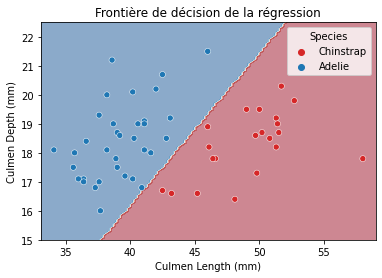

In [33]:
DecisionBoundaryDisplay.from_estimator(
    modele, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)

seaborn.scatterplot(
    data=dataset_test, x=nom_predicteurs[0], y=nom_predicteurs[1],
    hue=nom_cible, palette=["tab:red", "tab:blue"])
_ = pyplot.title("Frontière de décision de la régression")

## Impact d'un paramètre sur la frontière de décision

In [34]:
modele = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2")    # avec pénalisation L^2
)
modele

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [35]:
Cs = [0.01, 0.1, 1, 10]    # valeurs admissibles pour C

for C in Cs:
    modele.set_params(logisticregression__C=C)
    modele.fit(data_train, cible_train)
    precision = modele.score(data_test, cible_test)

    DecisionBoundaryDisplay.from_estimator(
        modele,
        dataset_test,
        response_method="predict",
        cmap="RdBu_r",
    )
    seaborn.scatterplot(
        data=dataset_test, x=nom_predicteurs[0], y=nom_predicteurs[1],
        hue=nom_cible, palette=["tab:red", "tab:blue"])
    pyplot.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
    pyplot.title(f"C: {C} \n Accuracy on the test set: {precision:.2f}")

TypeError: ignored

### Visualisation de l'impact de `C` sur les coefficients de la régression